In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import os

In [3]:
def fetch_pokemon_data(n=30):
    pokemons = []
    for i in range(1, n+1):
        url = f"https://pokeapi.co/api/v2/pokemon/{i}"
        res = requests.get(url)
        if res.status_code == 200:
            data = res.json()
            pokemons.append({
                "id": i,
                "name": data["name"],
                "type_1": data["types"][0]["type"]["name"],
                "type_2": data["types"][1]["type"]["name"] if len(data["types"]) > 1 else None,
                "hp": data["stats"][0]["base_stat"],
                "attack": data["stats"][1]["base_stat"],
                "defense": data["stats"][2]["base_stat"],
                "speed": data["stats"][5]["base_stat"]
            })
    print(f" {len(pokemons)} Pokémon fetched successfully!")
    return pokemons

pokemons = fetch_pokemon_data(30)

✅ 30 Pokémon fetched successfully!


In [4]:
os.makedirs("data", exist_ok=True)
with open("data/pokemons.json", "w", encoding="utf-8") as f:
    json.dump(pokemons, f, indent=4)

print("💾 Data saved to data/pokemons.json")


💾 Data saved to data/pokemons.json


In [5]:
df = pd.DataFrame(pokemons)
df.head()

id        name type_1  type_2  hp  attack  defense  speed
0   1   bulbasaur  grass  poison  45      49       49     45
1   2     ivysaur  grass  poison  60      62       63     60
2   3    venusaur  grass  poison  80      82       83     80
3   4  charmander   fire    None  39      52       43     65
4   5  charmeleon   fire    None  58      64       58     80

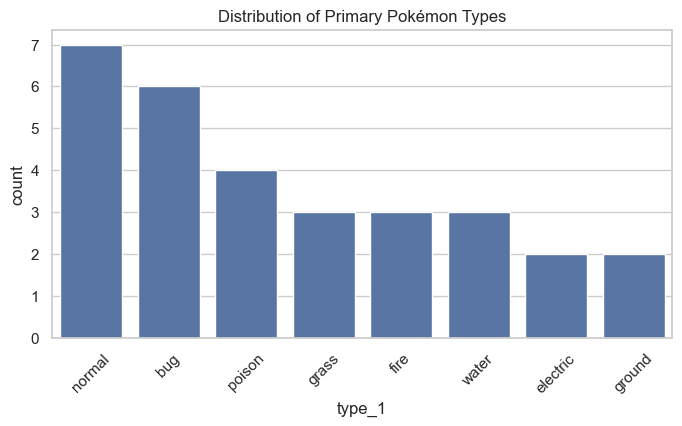

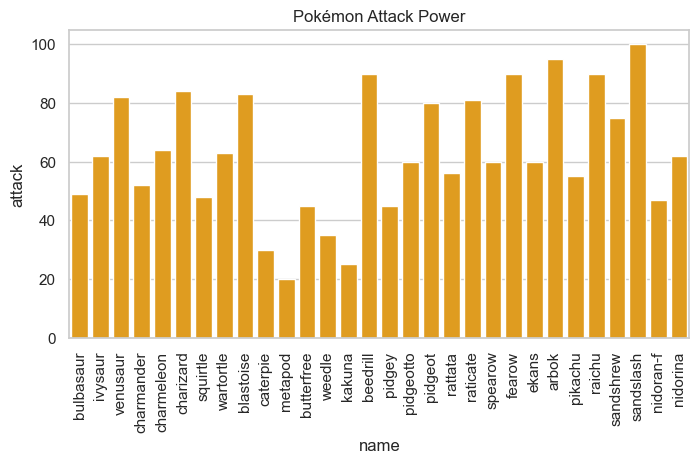

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="type_1", order=df["type_1"].value_counts().index)
plt.title("Distribution of Primary Pokémon Types")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=df, x="name", y="attack", color="orange")
plt.title("Pokémon Attack Power")
plt.xticks(rotation=90)
plt.show()

In [7]:
df["total_power"] = df["hp"] + df["attack"] + df["defense"] + df["speed"]
strongest = df.loc[df["total_power"].idxmax()]

print(f" Strongest Pokémon: {strongest['name'].title()}")
print(f"Total Power: {strongest['total_power']}")
df.sort_values("total_power", ascending=False).head(5)

💪 Strongest Pokémon: Sandslash
Total Power: 350


id       name  type_1  type_2  hp  attack  defense  speed  total_power
27  28  sandslash  ground    None  75     100      110     65          350
5    6  charizard    fire  flying  78      84       78    100          340
8    9  blastoise   water    None  79      83      100     78          340
17  18    pidgeot  normal  flying  83      80       75    101          339
2    3   venusaur   grass  poison  80      82       83     80          325

In [8]:
report_name = f"Pokemon_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.html"
df.describe().to_html(report_name)
print(f" Report generated: {report_name}")


📄 Report generated: Pokemon_Report_20251024_144052.html


In [13]:
print("🎉 POKÉPIPELINE APP SUMMARY 🎉")
print(f"Total Pokémon Analyzed: {len(df)}")
print(f"Strongest Pokémon: {strongest['name'].title()}")
print(f"Average Attack: {df['attack'].mean():.2f}")
print(f"Average Defense: {df['defense'].mean():.2f}")
print(f"Report saved as HTML file: {report_name}")


🎉 POKÉPIPELINE APP SUMMARY 🎉
Total Pokémon Analyzed: 30
Strongest Pokémon: Sandslash
Average Attack: 62.93
Average Defense: 58.70
Report saved as HTML file: Pokemon_Report_20251024_144052.html
